<a href="https://colab.research.google.com/github/shinyarah/knn-naives/blob/main/Moringa_School_Core_Module2_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#defining the question
###1.specifying the question
###2. defining the metric for success
this will be achieved when the most accurate knn model is achieved and implemented
###3. understaing the context
titanic was a passenger liner that sank in April 1912. 
###4. experimental design
*   read data
*   clean data
*   perform univariate, bivariate and multivariate analysis
*   create knn model using diffferent training and test sizes
*   challenge solution



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#loading dataset
week4 = pd.read_csv('/content/train (5).csv')
week4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
week4.shape

(891, 12)

In [4]:
week4.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
display(week4.dtypes.value_counts())

object     5
int64      5
float64    2
dtype: int64

In [7]:
week4.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [10]:
week4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
week4.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#filling null values for age with the mean age
week4['Age'].fillna(week4['Age'].mean(),inplace=True)

In [13]:
#Dropping unnecessary columns
week4= week4.drop(['Name','Ticket','Cabin','PassengerId'],1)
week4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
week4.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [15]:
#dropping other missing values
week4.dropna(inplace=True)

In [16]:
#checking for duplicates
week4.duplicated().sum()

111

In [17]:
#dropping duplicates
week4.drop_duplicates(inplace=True)

In [19]:
#label encoding categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
week4['Embarked']= le.fit_transform(week4['Embarked'])
week4['Sex']=le.fit_transform(week4['Sex'])
week4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

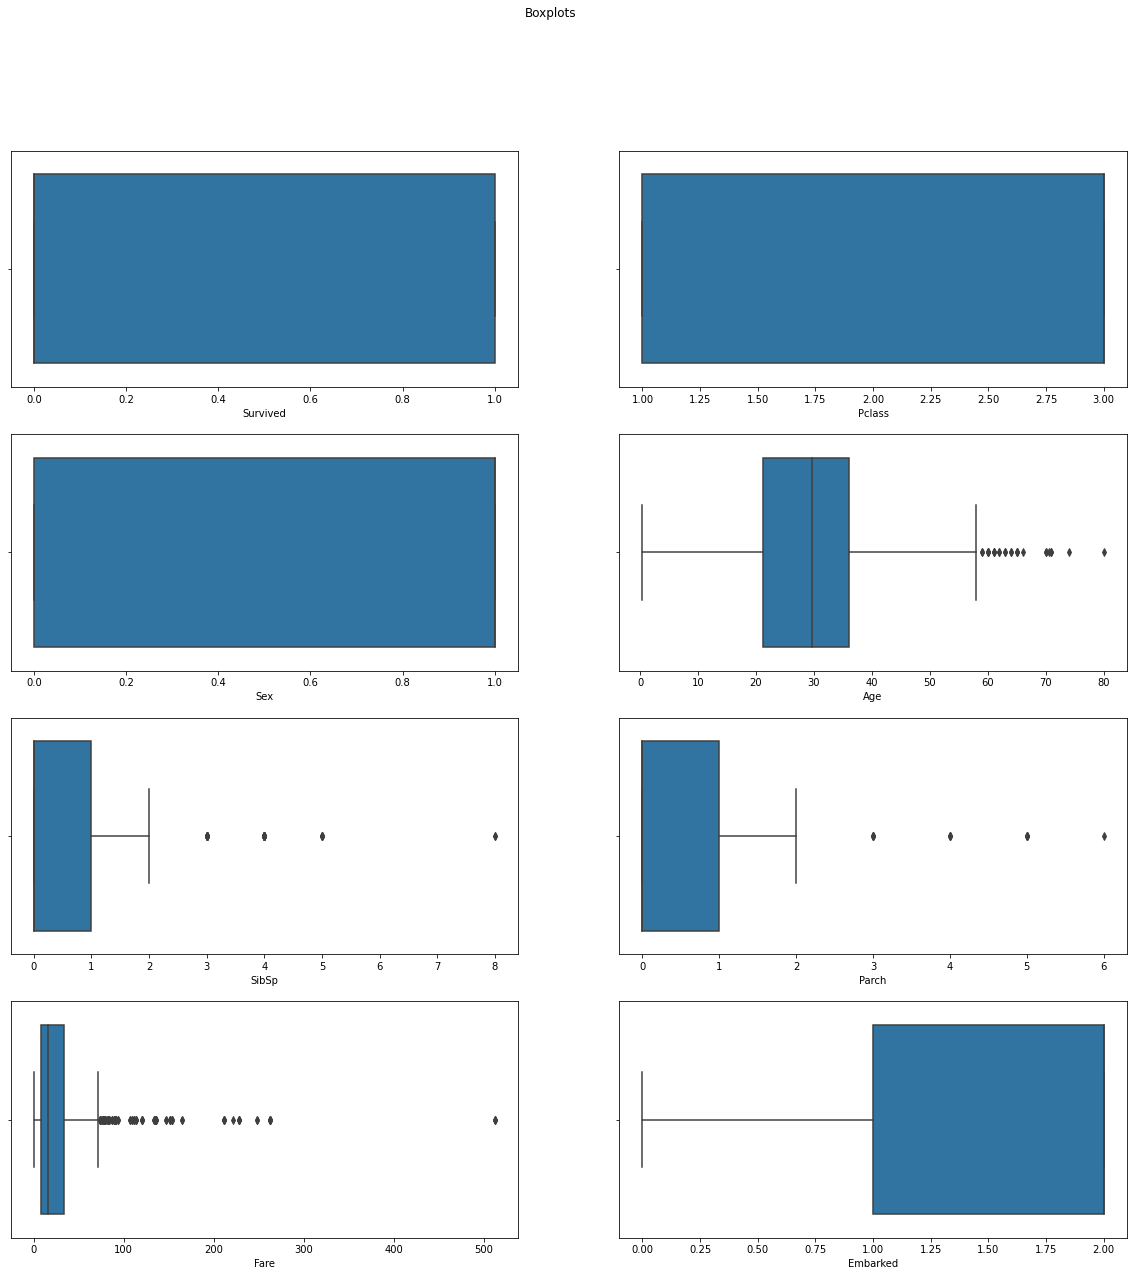

In [20]:
# Checking for outliers
fig,((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4,2, figsize=(20, 20))
fig.suptitle('Boxplots')
sb.boxplot(week4['Survived'], ax=ax1)
sb.boxplot(week4['Pclass'], ax=ax2)
sb.boxplot(week4['Sex'], ax=ax3)
sb.boxplot(week4['Age'], ax=ax4)
sb.boxplot(week4['SibSp'], ax=ax5)
sb.boxplot(week4['Parch'], ax=ax6)
sb.boxplot(week4['Fare'], ax=ax7)
sb.boxplot(week4['Embarked'], ax=ax8)

#Exploratory Data Analysis

###Univariate Analysis

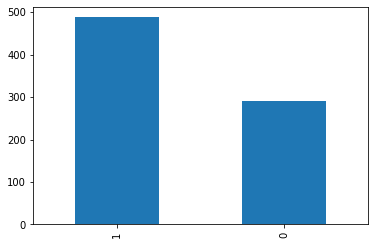

<Figure size 1008x648 with 0 Axes>

In [21]:
#categorical variables
week4['Sex'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

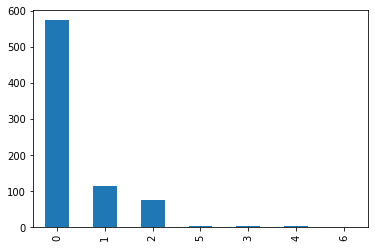

In [22]:
week4['Parch'].value_counts().plot(kind='bar')

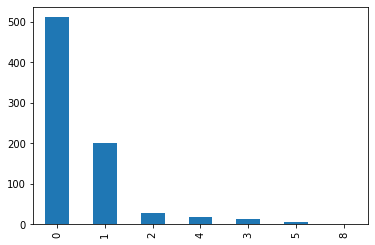

In [23]:
week4['SibSp'].value_counts().plot(kind='bar')

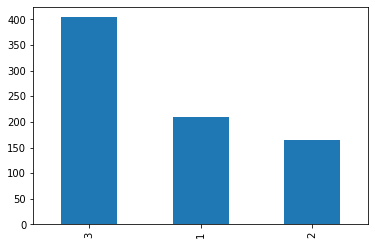

In [25]:
week4['Pclass'].value_counts().plot(kind='bar')

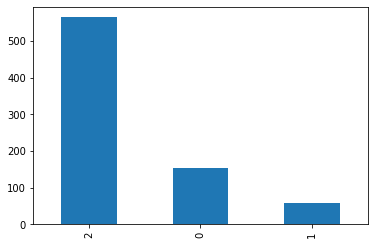

In [24]:
week4['Embarked'].value_counts().plot(kind='bar')

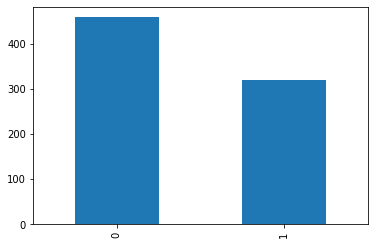

In [26]:
week4['Survived'].value_counts().plot(kind='bar')

In [29]:
#numerical variables
#measure of central tendency of age
mean = week4["Age"].mean()
median = week4["Age"].median()
mode = week4["Age"].mode()
std = week4["Age"].std()
var = week4["Age"].var()
max = week4["Age"].max()
min = week4["Age"].min()
range = max - min
quantile = week4["Age"].quantile([0.25,0.5,0.75])
print('The mean of Age  is',mean)
print('The median of Age is',median)
print('The mode of Age is',mode)
print('The standard deviation of Age is',std)
print('The variance of Age is',var)
print('The Range of Age  is',range)
print('The quantile of Age is',quantile)

kurt = week4['Age'].kurt()
print("The kurtosis for the Age  is: ", kurt)

The mean of Age  is 29.745666112203203
The median of Age is 29.69911764705882
The mode of Age is 0    29.699118
dtype: float64
The standard deviation of Age is 13.67454970775624
The variance of Age is 186.9933097098963
The Range of Age  is 79.58
The quantile of Age is 0.25    21.250000
0.50    29.699118
0.75    36.000000
Name: Age, dtype: float64
The kurtosis for the Age  is:  0.5889607303622988


In [30]:
#measure of central tendency for fare
mean = week4["Fare"].mean()
median = week4["Fare"].median()
mode = week4["Fare"].mode()
std = week4["Fare"].std()
var = week4["Fare"].var()
max = week4["Fare"].max()
min = week4["Fare"].min()
range = max - min
quantile = week4["Fare"].quantile([0.25,0.5,0.75])
print('The mean of Fare  is',mean)
print('The median of Fare is',median)
print('The mode of Fare is',mode)
print('The standard deviation Fare of is',std)
print('The variance of Fare is',var)
print('The Range of Fare is',range)
print('The quantile of Fare is',quantile)
kurt = week4['Fare'].kurt()
print("The kurtosis for the Fare  is: ", kurt)

The mean of Fare  is 34.71298701799485
The median of Fare is 15.9
The mode of Fare is 0    13.0
dtype: float64
The standard deviation Fare of is 52.28032556629783
The variance of Fare is 2733.2324413180945
The Range of Fare is 512.3292
The quantile of Fare is 0.25     8.0500
0.50    15.9000
0.75    33.8906
Name: Fare, dtype: float64
The kurtosis for the Fare  is:  30.157424264662524


In [31]:
#finding the skewness for age
skew = week4['Age'].skew()
print("The skewness for the Age is: ", skew)
if skew == 0:
  print("The distribution is symmetrical")
elif skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness for the Age is:  0.39572787881653304
The distribution is positively skewed




In [32]:
#skewness for fare

# Skewness
skew = week4['Fare'].skew()
print("The skewness for the Fare is: ", skew)
if skew == 0:
  print("The distribution is symmetrical")
elif skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness for the Fare is:  4.573366607470178
The distribution is positively skewed




In [33]:
#plotting univariate summaries 
# installing pandas profiling
! pip install -U pandas-profiling

     |████████████████████████████████| 256kB 4.2MB/s 
     |████████████████████████████████| 112kB 36.0MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 3.1MB 36.3MB/s 
     |████████████████████████████████| 645kB 34.7MB/s 
     |████████████████████████████████| 1.1MB 37.5MB/s 
     |████████████████████████████████| 10.1MB 39.6MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 296kB 48.3MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=8e4c548053bd62d4d77e234c477ea1e6698ef5a60d72c57d06d92366c848987d
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=295e02910798df75641e9c280e9075adcf4f4be9ceaa84c15c09f4247d470c6f
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d856

###bivariate Analysis

In [34]:
correlation = week4.corr()
correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.333291,-0.511686,-0.084185,-0.036044,0.071352,0.244700,-0.157858
Pclass,-0.333291,1.000000,0.113210,-0.335180,0.085055,0.037218,-0.551236,0.181243
Sex,-0.511686,0.113210,1.000000,0.099034,-0.099980,-0.239210,-0.166952,0.101821
Age,-0.084185,-0.335180,0.099034,1.000000,-0.279150,-0.185872,0.087692,-0.034728
SibSp,-0.036044,0.085055,-0.099980,-0.279150,1.000000,0.380174,0.135490,0.064530
Parch,0.071352,0.037218,-0.239210,-0.185872,0.380174,1.000000,0.192411,0.044173
Fare,0.244700,-0.551236,-0.166952,0.087692,0.135490,0.192411,1.000000,-0.239262
Embarked,-0.157858,0.181243,0.101821,-0.034728,0.064530,0.044173,-0.239262,1.000000


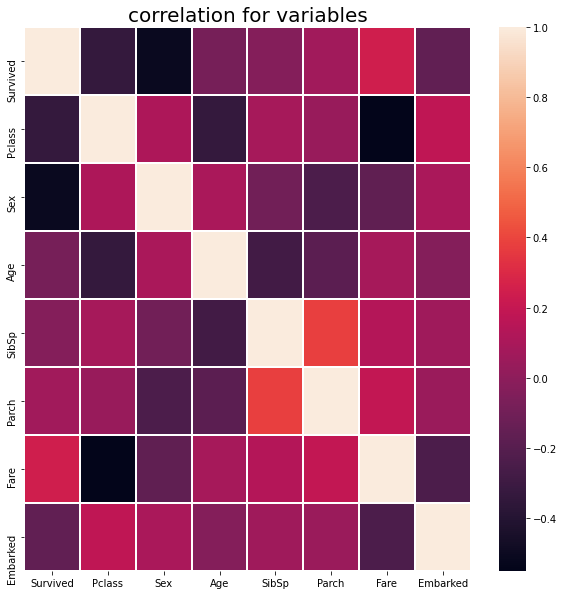

In [38]:

plt.figure(figsize=(10,10))
sb.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,linewidth=1.0,annot=False)
plt.title('correlation for variables',fontsize=20)
plt.show()

###Multivariate Analysis

In [39]:

# Separating the target label 
X = week4.drop('Survived',axis=1)
y = week4['Survived']
# Subjecting features to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)

,0
Fare,0.000982
Age,-0.041844
Parch,-0.102355
Embarked,-0.194782
SibSp,-0.308218
Pclass,-1.184578
Sex,-3.112974


##Implementing the Solution

###KNN

In [40]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler

In [41]:
#splitting variables intp dependent and independent
X = week4.drop(['Survived'],axis=1)
y = week4['Survived']

In [42]:
# Feature Scaling
scaler = RobustScaler()
scaler.fit_transform(X)

array([[ 0.        ,  0.        , -0.52197408, ...,  0.        ,
        -0.33474455,  0.        ],
       [-1.        , -1.        ,  0.56277168, ...,  0.        ,
         2.1432668 , -2.        ],
       [ 0.        , -1.        , -0.25078764, ...,  0.        ,
        -0.30862286,  0.        ],
       ...,
       [ 0.        , -1.        ,  0.        , ...,  2.        ,
         0.29217588,  0.        ],
       [-1.        ,  0.        , -0.25078764, ...,  0.        ,
         0.54565296, -2.        ],
       [ 0.        ,  0.        ,  0.15599202, ...,  0.        ,
        -0.31539515, -1.        ]])

80-20 split

In [43]:
#training using 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
reg= KNeighborsClassifier()
params = reg.get_params()
params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [45]:
clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[67 24]
 [32 33]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        91
           1       0.58      0.51      0.54        65

    accuracy                           0.64       156
   macro avg       0.63      0.62      0.62       156
weighted avg       0.64      0.64      0.64       156



70-30 split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
reg= KNeighborsClassifier()
params = reg.get_params()
params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [50]:
clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
y_pred = clf.predict(X_test)


print(confusion_matrix(y_test, y_pred))

[[95 32]
 [60 47]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67       127
           1       0.59      0.44      0.51       107

    accuracy                           0.61       234
   macro avg       0.60      0.59      0.59       234
weighted avg       0.60      0.61      0.60       234



60-40 split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [54]:
reg= KNeighborsClassifier()
params = reg.get_params()
params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [55]:
clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[132  40]
 [ 80  60]]


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69       172
           1       0.60      0.43      0.50       140

    accuracy                           0.62       312
   macro avg       0.61      0.60      0.59       312
weighted avg       0.61      0.62      0.60       312



the 80-20 split returns the highest accuracy. this is what we shall use to optimise our model

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]

In [60]:
#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
grid_search = GridSearchCV(estimator=reg, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 72.18 %
Best Parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [61]:
clf = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='manhattan', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[68 23]
 [29 36]]


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        91
           1       0.61      0.55      0.58        65

    accuracy                           0.67       156
   macro avg       0.66      0.65      0.65       156
weighted avg       0.66      0.67      0.66       156



after subjecting our model to hyperparameter tuning, the accutacy score increased to 67% from 64%

###challenging the solution
1. the missing values provided an opportunity for error in our project

2. by increasing the number of observations for training and testing we could improve the model's performance

###follow up questions
####1. did we have the right data?
yes, the data provided for this project was right and relevant
####2. do we need more data?
no, the data provided was adequate. but the missing values did pose a significant problem
####3. did we have the right question?
yes, the right question for this project was posed
